In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os
import time

from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]
E_h = physical_constants['Hartree energy'][0]
En_h = alpha**2.0 * m_e * c**2.0;
scl = c*10**-9 * En_h /(h * c);

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Calculate Stark map

In [2]:
# In an electric field (with B=0)
# quantum numbers
nmin = 5
nmax = 5
S = 1
n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals #- get_qd(S, n_vals, L_vals, J_vals)
# energy levels
En = En_0(neff) #W_n(S, n_vals, L_vals, J_vals)
# field-free Hamiltonian
H_0 = np.diag(En)
# find the off-diagonal terms of the Stark interaction matrix
mat_S_cros = stark_matrix(neff, L_vals, m_vals, field_orientation='crossed')
mat_S_para = stark_matrix(neff, L_vals, m_vals, field_orientation='parallel')
field_angle = (0/90) * np.pi/2
mat_S = np.cos(field_angle) * mat_S_para + np.sin(field_angle) * mat_S_cros

Calculating Stark terms: 100%|██████████| 25/25 [00:00<00:00, 1251.33it/s]


In [3]:
# specify the electric field
field = np.linspace(0.00, 1.0*10**5, 101) # V /cm
field_au = field * 100 / (En_h_He/(e*a_0_He))
# specify the magnetic field (in Telsa)
B_z = 2.04E1
# (in atomic units)
B_z_au = B_z / (hbar/(e*a_0_He**2))
# Zeeman interaction Hamiltonian
H_Z = np.diag(E_zeeman(m_vals, B_z_au))
# diagonalise for each field
eig_vals, eig_vecs = stark_map_vec(H_0, mat_S, field_au, H_Z=H_Z)

diagonalise Hamiltonian: 100%|██████████| 101/101 [00:00<00:00, 3043.83it/s]


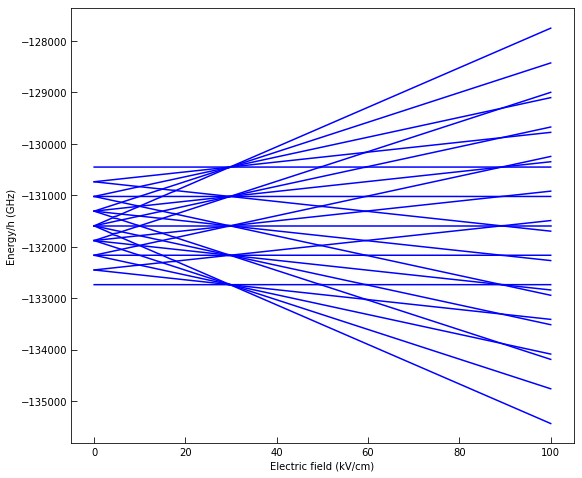

In [4]:
plt.figure(figsize=(9,8))
gca = plt.gca()
ax = plt.plot(field/10**3, eig_vals*scl, 'b')
plt.xlabel('Electric field (kV/cm)')
plt.ylabel('Energy/h (GHz)')
gca.tick_params(direction='in', length=6)

In [5]:
def stark_map(B=0, theta=0):
    # In an electric field (with B=0)
    # quantum numbers
    nmin = 5
    nmax = 5
    S = 1
    n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
    J_vals = get_J_vals(S, L_vals, 1)
    # quantum defects
    neff = n_vals #- get_qd(S, n_vals, L_vals, J_vals)
    # energy levels
    En = En_0(neff) #W_n(S, n_vals, L_vals, J_vals)
    # field-free Hamiltonian
    H_0 = np.diag(En)
    # find the off-diagonal terms of the Stark interaction matrix
    mat_S_cros = stark_matrix(neff, L_vals, m_vals, field_orientation='crossed', disableTQDM=True)
    mat_S_para = stark_matrix(neff, L_vals, m_vals, field_orientation='parallel', disableTQDM=True)
    field_angle = (theta/90) * np.pi/2
    mat_S = np.cos(field_angle) * mat_S_para + np.sin(field_angle) * mat_S_cros

    # specify the electric field
    field = np.linspace(0.00, 1.0*10**5, 101) # V /cm
    field_au = field * 100 / (En_h_He/(e*a_0_He))
    # specify the magnetic field (in Telsa)
    B_z = B#2.04E1
    # (in atomic units)
    B_z_au = B_z / (hbar/(e*a_0_He**2))
    # Zeeman interaction Hamiltonian
    H_Z = np.diag(E_zeeman(m_vals, B_z_au))
    # diagonalise for each field
    eig_vals, eig_vecs = stark_map_vec(H_0, mat_S, field_au, H_Z=H_Z, disableTQDM=True)

    plt.figure(figsize=(9,8))
    gca = plt.gca()
    ax = plt.plot(field/10**3, eig_vals*scl, 'b')
    plt.xlabel('Electric field (kV/cm)')
    plt.ylabel('Energy/h (GHz)')
    gca.tick_params(direction='in', length=6)

In [6]:
interact(stark_map, B=(0,20,1), theta=(0,90,3));

interactive(children=(IntSlider(value=0, description='B', max=20), IntSlider(value=0, description='theta', max=90, step=3), Output()), _dom_classes=('widget-interact',))